# Using VGG16 and MobileNet to create a Model to detect between 10 Different Animals

## Importing all the necessary modules for this Project

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# This import is used for Generating multiple similar images
# It is omitted in this project as the dataset was already very large

from sklearn.metrics import confusion_matrix
import itertools

import os
from PIL import Image
import random
from sklearn.utils import shuffle

In [ ]:
"""
Activating GPUs
"""

physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
for i in range(len(physical_devices)):
    tf.config.experimental.set_memory_growth(physical_devices[i], True)

Num GPUs Available:  1


## Creating a Dictionary to Alter the given information to English

In [ ]:
translate = {"Butterfly": "farfalla", 
             "Cat": "gatto", 
             "Chicken": "gallina", 
             "Cow": "mucca",
             "Dog": "cane",  
             "Elephant" : "elefante", 
             "Horse": "cavallo",
             "Sheep": "pecora",
             "Spider": "ragno", 
             "Squirrel": "scoiattolo", 
             "farfalla": "Butterfly", 
             "gatto": "Cat", 
             "gallina": "Chicken", 
             "mucca": "Cow", 
             "cane": "Dog", 
             "elefante": "Elephant", 
             "cavallo": "Horse", 
             "pecora": "Sheep", 
             "ragno": "Spider", 
             "scoiattolo": "Squirrel"}

In [ ]:
class_labels = ['Butterfly', 'Cat', 'Chicken', 'Cow', 'Dog', 'Elephant', 'Horse', 'Sheep', 'Spider', 'Squirrel']

## Downloading all the Images and Resizing them to the Standard Size

In [ ]:
"""
Used for creating similar images of the ones already in the Dataset.
Omitted in this project due the large dataset.

gen = ImageDataGenerator(rotation_range=10, 
                         width_shift_range=0.1, 
                         height_shift_range=0.1, 
                         shear_range=0.15, 
                         zoom_range=0.1, 
                         channel_shift_range=10., 
                         horizontal_flip=True)
"""

In [ ]:
%%time

Train_Data = []
Train_Labels = []

Validation_Data = []
Validation_Labels = []

Test_Data = []
Test_Labels = []

directory = "raw-img/"
for animal in os.listdir(directory):
    Pictures = []
    Labels = []
    
    for img_name in os.listdir(directory+animal):
        img = Image.open(directory + "/" + animal + "/" + img_name)
        img = img.resize((224, 224)) # Resizing all the images to the same size is necessary to train the model. 
        img = np.asarray(img)
#         if img.shape == (224, 224, 3):
#           img = np.asarray([img])
#           aug_iter = gen.flow(img)
#           aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(2)] 
#           # Creates 2 unique images that are slightly modified from the original image
          
#           for img in aug_images:
"""
Code for Generating multiple similar images but omitted due to already large data set.
"""        

        if img.shape == (224, 224, 3):
            Pictures.append(img)
            Labels.append(class_labels.index(translate[animal]))
            
    # Randomly assigning all the images to Validation, Test, and Train Data Sets.
    
    for _ in range(50): # Validation Data will have 50 Images for each animal (Thus 500 for all 10 animals)
        i = random.randint(0, len(Pictures)-1)
        Validation_Data.append(Pictures.pop(i))
        Validation_Labels.append(Labels.pop(i))
    
    for _ in range(400): # Test Data will have 400 Images for each animal (Thus 4000 for all 10 animals)
        i = random.randint(0, len(Pictures)-1)
        Test_Data.append(Pictures.pop(i))
        Test_Labels.append(Labels.pop(i))
    
    # Train Data will have the rest of the images
    Train_Data.extend(Pictures)
    Train_Labels.extend(Labels)
    
    print("Completed Importing and Sorting All " + translate[animal] + " Images")

# Converting all lists to numpy arrays
Train_Data = np.asarray(Train_Data)
Train_Labels = np.asarray(Train_Labels)

Validation_Data = np.asarray(Validation_Data)
Validation_Labels = np.asarray(Validation_Labels)

Test_Data = np.asarray(Test_Data)
Test_Labels = np.asarray(Test_Labels)
    
print("Completed Importing All Images")

Completed Importing and Sorting All Elephant Images
Completed Importing and Sorting All Chicken Images
Completed Importing and Sorting All Butterfly Images
Completed Importing and Sorting All Horse Images
Completed Importing and Sorting All Spider Images
Completed Importing and Sorting All Cat Images
Completed Importing and Sorting All Squirrel Images
Completed Importing and Sorting All Cow Images
Completed Importing and Sorting All Sheep Images
Completed Importing and Sorting All Dog Images
Completed Importing All Images
CPU times: user 1min 52s, sys: 10.5 s, total: 2min 3s
Wall time: 2h 15min 35s


## Shuffling All Data

In [ ]:
"""
Shuffling all the Images so there is no bias in training the model.
"""

Train_Data, Train_Labels = shuffle(Train_Data, Train_Labels)
Validation_Data, Validation_Labels = shuffle(Validation_Data, Validation_Labels)
Test_Data, Test_Labels = shuffle(Test_Data, Test_Labels)

## VGG16 Model
More Information at https://neurohive.io/en/popular-networks/vgg16/

In [ ]:
"""
Requires Internet Connection
"""
vgg16_model = keras.applications.vgg16.VGG16()

553467904/553467096 [==============================] - 4s 0us/step


In [ ]:
"""
Duplicating the VGG16 model to use it as a sequential model and setting the trainable of all of the VGG16 layers to false.
"""
vgg16_sequential_model = keras.Sequential()

for layer in vgg16_model.layers[:-1]:
    vgg16_sequential_model.add(layer)

for layer in vgg16_sequential_model.layers:
    layer.trainable = False

In [ ]:
"""
Creating an output layer of 10 units because of our data having 10 unique animals.
"""
vgg16_sequential_model.add(keras.layers.Dense(units=10, activation="softmax"))

In [ ]:
%%time
"""
Compiling and Training the sequential VGG16 model.
"""
vgg16_sequential_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
vgg16_sequential_model.fit(Train_Data, Train_Labels, validation_data=(Validation_Data, Validation_Labels), epochs=2, shuffle=True)

Epoch 1/2
676/676 [==============================] - 131s 141ms/step - loss: 0.4288 - accuracy: 0.8920 - val_loss: 0.7737 - val_accuracy: 0.8540
Epoch 2/2
676/676 [==============================] - 95s 141ms/step - loss: 0.2325 - accuracy: 0.9375 - val_loss: 0.5034 - val_accuracy: 0.8960
CPU times: user 45.6 s, sys: 5.03 s, total: 50.7 s
Wall time: 4min 22s


In [ ]:
"""
Evaluating the sequential VGG16 model.
"""
vgg16_sequential_model.evaluate(Test_Data, Test_Labels)

125/125 [==============================] - 17s 134ms/step - loss: 0.4654 - accuracy: 0.9015


[0.46537068486213684, 0.9014999866485596]

## MobileNet
More Information at https://deeplizard.com/learn/video/OO4HD-1wRN8

In [ ]:
"""
Requires Internet Connection
"""
mobilenet = keras.applications.mobilenet.MobileNet()

17227776/17225924 [==============================] - 0s 0us/step


In [ ]:
"""
Takes all the layers of MobileNet except for the last 6 layers and creating an output layer of 10 units.
"""
x = mobilenet.layers[-6].output
output = keras.layers.Dense(units=10, activation="softmax")(x)

mobilenet_model = keras.Model(inputs=mobilenet.input, outputs=output)

In [ ]:
%%time
"""
Compiling and Training the MobileNet model.
"""

mobilenet_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

mobilenet_model.fit(Train_Data, Train_Labels, validation_data=(Validation_Data, Validation_Labels), epochs=12, shuffle=True)

Epoch 1/12
676/676 [==============================] - 134s 192ms/step - loss: 0.4397 - accuracy: 0.8640 - val_loss: 0.7198 - val_accuracy: 0.8100
Epoch 2/12
676/676 [==============================] - 128s 189ms/step - loss: 0.2412 - accuracy: 0.9227 - val_loss: 0.2979 - val_accuracy: 0.8940
Epoch 3/12
676/676 [==============================] - 128s 189ms/step - loss: 0.1798 - accuracy: 0.9405 - val_loss: 0.6539 - val_accuracy: 0.8280
Epoch 4/12
676/676 [==============================] - 128s 189ms/step - loss: 0.1471 - accuracy: 0.9506 - val_loss: 0.3756 - val_accuracy: 0.8900
Epoch 5/12
676/676 [==============================] - 129s 191ms/step - loss: 0.1292 - accuracy: 0.9564 - val_loss: 0.7793 - val_accuracy: 0.8100
Epoch 6/12
676/676 [==============================] - 129s 191ms/step - loss: 0.1151 - accuracy: 0.9635 - val_loss: 0.5669 - val_accuracy: 0.8420
Epoch 7/12
676/676 [==============================] - 129s 190ms/step - loss: 0.1040 - accuracy: 0.9669 - val_loss: 0.5692 -

In [ ]:
"""
Evaluating the Model.
"""

mobilenet_model.evaluate(Test_Data, Test_Labels)

125/125 [==============================] - 4s 32ms/step - loss: 0.4412 - accuracy: 0.8995


[0.44116127490997314, 0.8995000123977661]

## Combining the VGG16 Model and the MobileNet Model to Obtain more Accuracy
In order to combine the VGG16 Model and the MobileNet Model for the Test Data we will have to use Predict on the VGG16 Model, and MobileNet model using Test Data (Each will return an array of values in which the index of the highest value corresponds to the predicted animal). Then sum the resulting arrays and the index of the highest value corresponds to the predicted animal of the combined model.

In [ ]:
%%time
vgg16_percentages = vgg16_sequential_model.predict(Test_Data)
mobilenet_percentages = mobilenet_model.predict(Test_Data)

combined_percentages = vgg16_percentages + mobilenet_percentages

vgg16_predictions = np.argmax(vgg16_percentages, axis=-1)
mobilenet_predictions = np.argmax(mobilenet_percentages, axis=-1)
combined_predictions = np.argmax(combined_percentages, axis=-1)

CPU times: user 22.6 s, sys: 98.5 ms, total: 22.7 s
Wall time: 26 s


In [ ]:
"""
Calculating the Accuracy of the Combined Model.
"""

com_acc = np.count_nonzero(combined_predictions==Test_Labels) / len(Test_Labels)
print("Accuracy of Combined Predictions: ", com_acc)

Accuracy of Combined Predictions:  0.939


In [ ]:
"""
This function is directly copied from scikit-learn's website. 
(https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py)
"""

def plot_confusion_matrix(cm, 
                          classes, 
                          normalize=False, 
                          title="Confusion Matrix", 
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
    
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], 
                 horizontalalignment="center", 
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")

## Confusion Matrix of VGG16 Model

Confusion matrix, without normalization


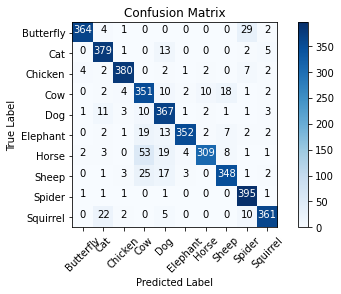

In [ ]:
cm = confusion_matrix(y_true=Test_Labels, y_pred=vgg16_predictions)
plot_confusion_matrix(cm=cm, classes=class_labels)

## Confusion Matrix of MobileNet Model 

Confusion matrix, without normalization


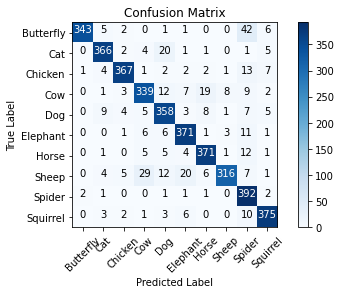

In [ ]:
cm = confusion_matrix(y_true=Test_Labels, y_pred=mobilenet_predictions)
plot_confusion_matrix(cm=cm, classes=class_labels)

## Confusion Matrix of the Combined Model

Confusion matrix, without normalization


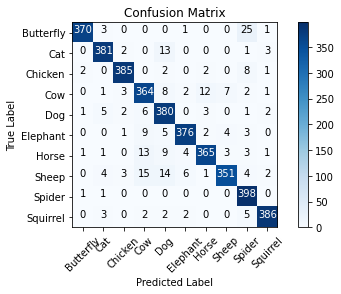

In [ ]:
cm = confusion_matrix(y_true=Test_Labels, y_pred=combined_predictions)
plot_confusion_matrix(cm=cm, classes=class_labels)

## Observations
As seen from above VGG16 Model has an accuracy of approximately 90.15%, MobileNet has an accuracy of approximately 89.95% and the Combined Model has an accuracy of approximately 93.9%. Hence the combination of VGG16 and MobileNet is significantly more accurate than both models. This is mainly because of the combination of MobileNet's low amount of trainable parameters (Causing a faster model) and VGG16's high amount of trainable parameters (Causing a more accurate model). Although the Combined Model has a higher accuracy the Combined Model uses both VGG16 Model and MobileNet Model hence it is slower than both models.